# Group 29: Final Project

We researched the best neighborhood in Pittsburgh with the metric of what is the safest neighborhood in Pittsburgh for kids. The three of us used fire incidents, speed humps, and playground equipment as the metric of the study. We found that from all areas, Squirrel Hill South was at or near the top for all the categories. From this, we made the conclusion that Squirrel Hill South is the safest neighborhood for kids in Pittsburgh.

## Playground Equipment

First, let's import pandas and our data file. The data file, "Playground-Equipment.csv", tells us about every piece of (recorded) playground equipment in Pittsburgh.

In [1]:
# load pandas
import pandas as pd
import numpy as np

# load data
playground_equipment = pd.read_csv("Playground-Equipment.csv")

Let's take a look at the first 10 rows of the data.

In [2]:
playground_equipment.head(10)

,id,name,equipment_type,manufacturer,safety_surface_type,ada_accessible,street_number,street,neighborhood,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
0,1780722587,Able Long Playground,Play Area 2 to 5,Little Tykes,Pour in Place,f,211.0,Coast Ave,Beechview,4,19,42003192000,5,19,6,4-28,40.408381,-80.028520
1,702514290,North Ave. Playground,Play Area 2 to 5,Playworld,SofSurfaces,f,377.0,W North Ave,Allegheny Center,1,22,42003562700,1,22,1,1-7,40.454526,-80.010188
2,1267038491,Vietnam Veteran's Playground,Slide,Little Tykes,SofSurfaces,f,108.0,Panther Hollow Rd,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.434185,-79.944323
3,14898932,Schenley Overlook Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432130,-79.947774
4,204832406,Schenley Overlook Playground,Slide,Little Tykes,SofSurfaces,f,NaN,Overlook Dr,Squirrel Hill South,5,14,42003980500,3,14,4,2-8,40.432215,-79.947817
5,788191865,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,f,1550.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456812,-80.075131
6,1387089430,Chartiers Playground,Swing 2 Bays,Little Tykes,SofSurfaces,t,3783.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457218,-80.075070
7,1838217886,Chartiers Playground,Play Area 2 to 5,Little Tykes,SofSurfaces,f,3789.0,Chartiers Ave,Windgap,2,28,42003563000,5,28,6,1-16,40.457329,-80.075145
8,1315630398,Chartiers Playground,Play Area 5 to 12,Little Tykes,SofSurfaces,f,1544.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456681,-80.075019
9,1603952265,Chartiers Playground,Whirl,NaN,SofSurfaces,f,1548.0,Summerdale St,Windgap,2,28,42003563000,5,28,6,1-16,40.456970,-80.075110


How many pieces of playground equipment are in each neighborhood? We can use .value_counts() for that!

In [3]:
playground_equipment["neighborhood"].value_counts()

Squirrel Hill South    32
East Liberty           26
Beechview              21
Allegheny Center       15
South Side Slopes      14
                       ..
Central Oakland         2
Lower Lawrenceville     2
Westwood                2
Strip District          1
West Oakland            1
Name: neighborhood, Length: 68, dtype: int64

Using the pure number of pieces of playground equipment as our metric, Squirrel Hill South is the best neighborhood. But what about other metrics, like disability accessibility and actual quality of equipment? Let's count the number of disability-accessible pieces of playground equipment in each neighborhood.

In [4]:
query_mask = playground_equipment["ada_accessible"] == "t"
disability_equipment = playground_equipment[query_mask]
disability_equipment["neighborhood"].value_counts()

Squirrel Hill South         7
Elliott                     4
East Liberty                4
Beechview                   4
South Side Slopes           4
Mount Washington            3
Sheraden                    3
Highland Park               3
Morningside                 2
South Side Flats            2
Lincoln-Lemington-Belmar    2
Hazelwood                   2
Crawford-Roberts            2
Beltzhoover                 2
Brighton Heights            2
Greenfield                  2
South Oakland               2
Carrick                     2
Fineview                    2
Bloomfield                  2
Manchester                  2
West End                    1
Homewood West               1
Polish Hill                 1
Spring Garden               1
Allentown                   1
Duquesne Heights            1
Spring Hill-City View       1
Lincoln Place               1
Upper Hill                  1
Upper Lawrenceville         1
Squirrel Hill North         1
Shadyside                   1
Homewood N

Once again, Squirrel Hill South comes out on top. The only ranking change among the top 5 is Allegheny Center, which drops way down, and Elliott, which ties East Liberty, Beechview, and South Side Slopes with 4 pieces of disability-accessible playground equipment.

Lastly, let's weight each piece of playground equipment based on its quality. To judge quality, we will use the "manufacturer" column. I have ranked the manufacturers based on a quick Google image search of some of their equipment. This ranking is somewhat arbitrary, but I did my best to give an incredibly *detailed* and *thorough* analysis of each (not).

First, let's print out all the unique types of manufacturers.

In [5]:
playground_equipment["manufacturer"].unique()

array(['Little Tykes', 'Playworld', nan, 'Gametime', 'Miracle',
       'Park Structures', 'Landscape Structures', 'Iron Mountain Forge',
       'Burke', 'Big Toys', 'Kompan'], dtype=object)

Here are my totally not arbitrary rankings:
1. Kompan (WTF is this an amusement park?) ![Kompan](https://dk22sb66g7qaa.cloudfront.net/aesir-dam-viewports/castle-and-nature-playground-made-from-robinia-1366.jpeg?rel=2020-12-15+10%3A49%3A27)
2. Burke (big and well-developed) ![Burke](https://www.bciburke.com/Portals/0/adam/Products%20Slider/NrWfuy30tkiBvIXviywlwQ/Image/field-of-dreams.jpg)
3. Landscape Structures (futuristic, would definitely play on it) ![Landscape](https://www.rossrec.com/wp-content/uploads/bfi_thumb/Hedra-playsystem-1-ojo8m76h9u248v59brz47n5r3kub5gv3acjmf2z6co.jpg)
4. Playworld (big slide) ![Playworld](https://playworld.com/sites/default/files/refresh-intro-image.jpg)
5. Little Tykes (car is cheap, fuel-efficient, and environmentally friendly) ![Little Tykes](https://m.media-amazon.com/images/I/71VEtPLgBxL._AC_SL1500_.jpg)
6. Park Structures (bland color scheme, but cool slide) ![Park Structures](https://www.miracle-recreation.com/content/uploads/2018/09/MREC_2018_OH_Westfork-Park_Structure-301.jpg)
7. Miracle (fairly standard, nothing exceptional) ![Miracle](https://hasley-recreation.com/wp-content/uploads/Destination-Park-Loganville-Georgia-Playground-Miracle-1024x682.jpg)
8. Gametime (terrible color scheme, but cool slide) ![Gametime](https://www.gametime.com/images/sized/GameTime-Playground-Tower-Rendering-18861-1621263048-3ecff71e66a3f640cb051d8d5d39bc69.jpg)
9. Iron Mountain Forge (lame) ![Iron Mountain Forge](https://ww1.prweb.com/prfiles/2011/04/21/8334129/green.jpg)
10. Big Toys (lame and too much exercise) ![Big Toys](https://www.bigtoys.com/images/homepage/category-traditionalstructures-img1.jpg)

I've created a point system based upon the rankings of the slides. Rank k gets 11 - k points. For example, Rank 1 gets 10 points, Rank 5 gets 6 points, and Rank 10 gets 1 point. With this points system in mind, I've calculated the total number of points for each neighborhood in the code block below.

In [6]:
equipment_types = ["Kompan", "Burke", "Landscape Structures", "Playworld", "Little Tykes", "Park Structures", "Miracle", "Gametime", "Iron Mountain Forge", "Big Toys"]

points = {}
for i in range(10):
    type = equipment_types[i];
    query_mask = playground_equipment["manufacturer"] == type
    equipment_of_type = playground_equipment[query_mask]; 
    seen_nbhds = {}
    for nbhd in equipment_of_type["neighborhood"]: 
        if nbhd in seen_nbhds: #points already added for nbhd for this type
            continue
        seen_nbhds[nbhd] = 1;
        num_of_type = equipment_of_type["neighborhood"].value_counts().get(nbhd)
        if not num_of_type: #num_of_type is None
            continue
        addition = (10 - i) * num_of_type #Number of points to add
        if nbhd in points:
            points[nbhd] += addition
        else:
            points[nbhd] = addition
ser = pd.Series(points)
ser = ser.sort_values(ascending=False)
print(ser)

East Liberty           232
Squirrel Hill South    141
Beechview              135
Allegheny Center        91
Hazelwood               83
                      ... 
Allentown               12
East Allegheny           7
West Oakland             7
Strip District           6
Hays                     4
Length: 68, dtype: int64


This data makes sense, as the rankings are largely the same. However, East Liberty is the sole owner of Kompan equipment, which is marked as the highest rated at 10 points each. This explains why East Liberty wins with a large margin on this sub-metric.

In [7]:
query_mask = playground_equipment["manufacturer"] == "Kompan"
kompan_equipment = playground_equipment[query_mask]
kompan_equipment["neighborhood"].value_counts()

East Liberty    18
Name: neighborhood, dtype: int64

Now, let's combine all three sub-metrics: total count, disability accessibility, and the weighted point system. To do so, let's normalize each metric (i.e. divide by the total sum) and then sum them for each neighborhood.

In [8]:
totals = {}

total_pge = playground_equipment["neighborhood"].value_counts().sum() #total pieces of playground equipment
total_de = disability_equipment["neighborhood"].value_counts().sum() #total pieces of disability equipmnet
total_wps = ser.sum() #total points in the weighted point system
for nbhd in playground_equipment["neighborhood"]:
    if nbhd in totals: #nbhd already counted
        continue
    pge_count = playground_equipment["neighborhood"].value_counts().get(nbhd) #playground equipment count
    de_count = disability_equipment["neighborhood"].value_counts().get(nbhd) #disability equipment count
    wps_count = ser.get(nbhd) #weighted point system count
    if not pge_count: 
        pge_count = 0 #handles exceptions
    if not de_count:
        de_count = 0 #handles exceptions
    if not wps_count:
        wps_count = 0 #handles exceptions
    totals[nbhd] = pge_count / total_pge + de_count / total_de + wps_count / total_wps 
totals_series = pd.Series(totals)
totals_series = totals_series.sort_values(ascending=False)
print(totals_series)

Squirrel Hill South    0.199659
East Liberty           0.189489
Beechview              0.141060
South Side Slopes      0.105008
Elliott                0.096349
                         ...   
Esplen                 0.009862
East Allegheny         0.009426
Hays                   0.008275
West Oakland           0.004931
Strip District         0.004548
Length: 68, dtype: float64


As expected, Squirrel Hill South comes out on top with the most equipment in total, the most disability-accessible equipment, and the second-highest quality rating. East Liberty is a close second, but most of its boost came from the ranking system, which is kind of arbitrary. Let's make a bar chart of the top 5 neighborhoods judged by our final normalized, combined metric.

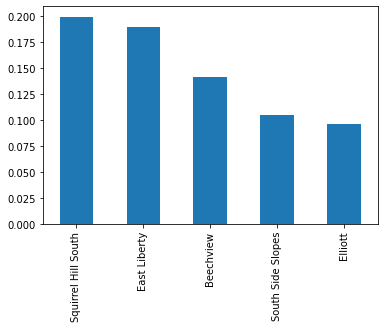

In [9]:
# Create a bar chart using the index as the category labels
pd.Series(totals_series.head(5)).plot.bar()

And, let's take a look at the top 10.

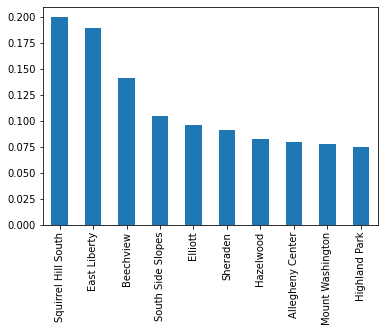

In [10]:
# Create a bar chart using the index as the category labels
pd.Series(totals_series.head(10)).plot.bar()

With all of this data in mind, **Squirrel Hill South** is the clearly best neighborhood for playground equipment!

## Fire Incidents

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

fire_Incidents = pd.read_csv("fireIncidents.csv")

Making a query mask to filter out just the neighborhoods with Passanger Vehicle fires

In [12]:
fire_data = pd.read_csv('fireIncidents.csv')
passenger_mask = fire_data['type_description'] == "Passenger vehicle fire"
rubbish_mask = fire_data['type_description'] == "Outside rubbish, trash or waste fire"


vehicle_Fires = fire_data[passenger_mask]
rubbish_Fires = fire_data[rubbish_mask]

In [13]:
vehicle_Fires['neighborhood'].value_counts()

Mount Washington       40
Homewood South         28
Squirrel Hill South    27
Hazelwood              25
Homewood North         23
                       ..
Hays                    1
Regent Square           1
Chartiers City          1
Arlington Heights       1
Swisshelm Park          1
Name: neighborhood, Length: 85, dtype: int64

The five safest neighborhoods for passanger fires is Hays, Swisshelm Park, Chartiers City, Arlington Heights, and Regent Square

In [14]:
rubbish_Fires['neighborhood'].value_counts()

Hazelwood                    35
Brookline                    30
South Side Flats             26
Carrick                      25
Central Business District    20
                             ..
Lower Lawrenceville           1
Westwood                      1
Glen Hazel                    1
Friendship                    1
Windgap                       1
Name: neighborhood, Length: 83, dtype: int64

The five safest neighborhoods for rubbish and trash fires are Windgap, Friendship, Lower Lawrenceville, Regent Square, and Upper Hill

METRIC #2 - Number of Alarms (The lower the number of alarms, the safer the neighborhood)

In [24]:
alarm_data = pd.read_csv("fireIncidents.csv")
alarm_mask = alarm_data['alarms'] == 0
number_of_alarms = alarm_data[alarm_mask]


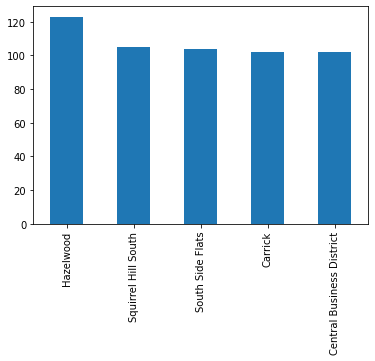

In [16]:
number_of_alarms['neighborhood'].value_counts().head().plot.bar()
#plt.bar(neighborhoods,number of alarms (best and worst))

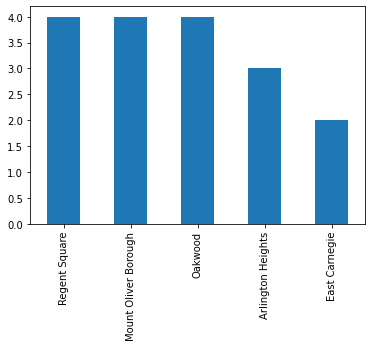

In [17]:
number_of_alarms['neighborhood'].value_counts().tail().plot.bar()

The neighborhoods with the most alarms  (the safest) Glen Hazel, Oakwood, Regent Square, Arlington Heights, and East Carnegie

FINAL CONCLUSION - The safest neighborhood according to these metrics would be Squirrel Hill South. I actually used to visit it all the time and loved every bit of it. Addtionally, according to these metrics, it's the most safe for children which, I believe, means that the entire neighborhood is safe in general. 

## Speed Humps

In [18]:
import pandas as pd
# import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
speed = pd.read_csv("speed.csv")

In [19]:
speed.groupby("neighborhood").count()

,id,hump_id,locator_address_number,locator_street,pavement,speed_hump_material,council_district,ward,tract,public_works_division,pli_division,police_zone,fire_zone,latitude,longitude
neighborhood,,,,,,,,,,,,,,,
Bloomfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Brookline,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Carrick,9,9,9,9,9,8,9,9,9,9,9,9,9,9,9
Central Oakland,1,1,0,1,1,1,1,1,1,1,1,1,1,1,1
Garfield,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
Highland Park,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2
Homewood South,4,4,4,4,4,4,4,4,4,4,4,4,4,4,4
Mount Washington,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
North Oakland,6,6,5,6,6,5,6,6,6,6,6,6,6,6,6


In [20]:
speed["neighborhood"].value_counts()

Squirrel Hill South    18
Carrick                 9
Polish Hill             6
North Oakland           6
Homewood South          4
Upper Hill              4
South Side Slopes       4
Brookline               4
Perry North             4
Garfield                3
Mount Washington        3
Bloomfield              3
South Side Flats        3
Squirrel Hill North     3
Highland Park           2
Overbrook               1
Stanton Heights         1
Central Oakland         1
Name: neighborhood, dtype: int64

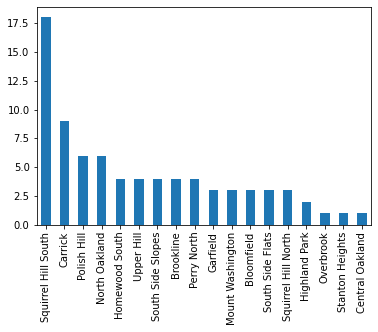

In [21]:
speed["neighborhood"].value_counts().plot.bar()

Squirrel Hill has by far the most speed bumps.

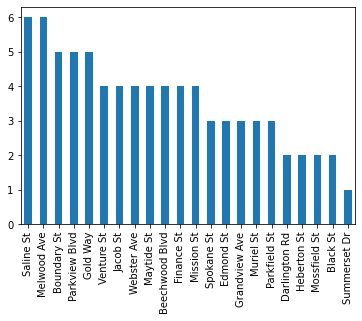

In [22]:
speed["locator_street"].value_counts().plot.bar()

In [23]:
speed["locator_street"].value_counts()

Saline St         6
Melwood Ave       6
Boundary St       5
Parkview Blvd     5
Gold Way          5
Venture St        4
Jacob St          4
Webster Ave       4
Maytide St        4
Beechwood Blvd    4
Finance St        4
Mission St        4
Spokane St        3
Edmond St         3
Grandview Ave     3
Muriel St         3
Parkfield St      3
Darlington Rd     2
Heberton St       2
Mossfield St      2
Black St          2
Summerset Dr      1
Name: locator_street, dtype: int64

No streets seem to have a ton more speed bumps than the rest.

After looking over the data, the negihborhoods with the most speed bumps have the roads with the most speed bumps, as you would expect. 

Based on number of speed bumps, the safest neighborhood for kids in Pittsburgh is Squirrel Hill South with the safest road in the neighborhood being Saline St.

In conclusion, I think Squirrel Hill Souh is the best neighborhood in Pittsburgh. It is the safest neighborhood as far as speed bumps go and also has fewer fires. There is also a large amount of playground equipment for kids.